# 2.3 Techniques to Avoid Overfitting: BatchNorm and Data Augmentation

Overfitting occurs when a model learns the training data too well, including its noise, and fails to generalize to new data. In this notebook, we explore two powerful techniques to combat overfitting: **Batch Normalization** and **Data Augmentation**.

## Learning Objectives
- Understand the concept and motivation behind Batch Normalization.
- Learn how Data Augmentation helps improve generalization.
- Implement both techniques in TensorFlow and PyTorch.
- Apply these methods to the MNIST dataset and observe their effects.
---

## Batch Normalization
Batch Normalization (BatchNorm) normalizes the inputs of each layer so that they have zero mean and unit variance. This helps stabilize and accelerate training, and can reduce overfitting.

**How it works:**
- During training, BatchNorm computes the mean and variance of each batch and normalizes the activations.
- It introduces two learnable parameters: scale ($\gamma$) and shift ($\beta$).
- During inference, it uses running averages computed during training.

**Benefits:**
- Reduces internal covariate shift
- Allows higher learning rates
- Acts as a regularizer

## Data Augmentation
Data Augmentation artificially increases the size and diversity of the training set by applying random transformations to the input data. This helps the model generalize better and reduces overfitting.

**Common augmentations for images:**
- Rotation
- Translation
- Flipping
- Scaling
- Adding noise

---
## The MNIST Dataset
We will use the MNIST dataset to demonstrate these techniques. MNIST consists of 70,000 images of handwritten digits (0-9), each 28x28 pixels.
Let's load and visualize some samples.

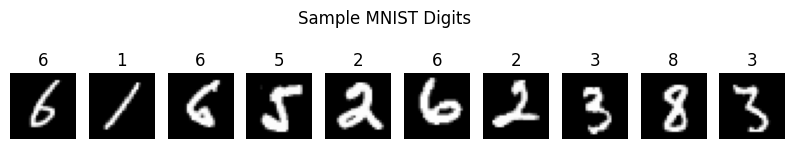

In [4]:
# Load and visualize MNIST dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    idx = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[idx]))
plt.suptitle('Sample MNIST Digits')
plt.show()

---
## BatchNorm and Augmentation in TensorFlow
Let's build a simple MLP for MNIST using TensorFlow, first without and then with BatchNorm and Data Augmentation.

/media/kmom/Data/github/kmom88/zero-to-hero-AI/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-06 12:53:32.190022: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-08-06 12:53:32.190046: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-08-06 12:53:32.190049: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: ASUS-F15
2025-08-06 12:53:32.190052: I external/local_xla/xla/stream_

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8436 - loss: 0.5203 - val_accuracy: 0.9487 - val_loss: 0.1790
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9312 - loss: 0.2302 - val_accuracy: 0.9620 - val_loss: 0.1224
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9442 - loss: 0.1818 - val_accuracy: 0.9669 - val_loss: 0.1016
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9515 - loss: 0.1568 - val_accuracy: 0.9716 - val_loss: 0.0877
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9557 - loss: 0.1441 - val_accuracy: 0.9751 - val_loss: 0.0761


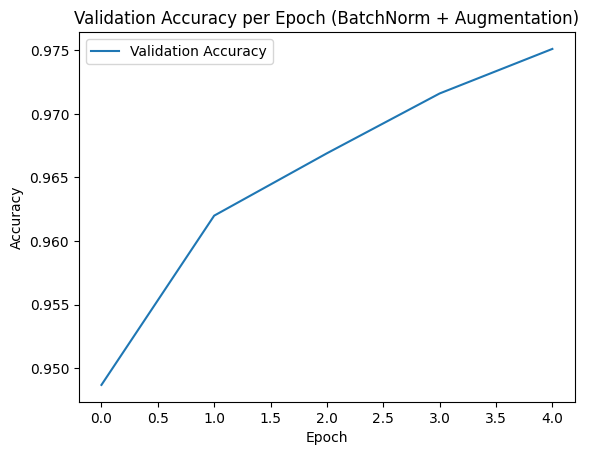

In [5]:
# TensorFlow: MLP with BatchNorm and Data Augmentation
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
x_train_aug = x_train.reshape(-1,28,28,1)
datagen.fit(x_train_aug)

# Model with BatchNorm
def build_model(batchnorm=True):
    model = tf.keras.Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        BatchNormalization() if batchnorm else tf.keras.layers.Activation('linear'),
        Dense(64, activation='relu'),
        BatchNormalization() if batchnorm else tf.keras.layers.Activation('linear'),
        Dense(10, activation='softmax')
    ])
    return model

# Training
model = build_model(batchnorm=True)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train_aug, y_train, batch_size=128),
                    epochs=5, validation_data=(x_test.reshape(-1,28,28,1), y_test), verbose=1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy per Epoch (BatchNorm + Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---
## BatchNorm and Augmentation in PyTorch
Now let's implement the same techniques in PyTorch.

In [6]:
# PyTorch: MLP with BatchNorm and Data Augmentation
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data Augmentation
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1,0.1)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))]))
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
for epoch in range(5):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            preds = out.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    print(f'Epoch {epoch+1}: Test accuracy={correct/total:.4f}')

/media/kmom/Data/github/kmom88/zero-to-hero-AI/venv/lib/python3.10/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch 1: Test accuracy=0.9588
Epoch 2: Test accuracy=0.9677
Epoch 3: Test accuracy=0.9706
Epoch 4: Test accuracy=0.9733
Epoch 5: Test accuracy=0.9777


---
## Summary and Practical Recommendations
- **Batch Normalization** stabilizes and accelerates training, and can act as a regularizer.
- **Data Augmentation** increases dataset diversity and helps models generalize.
- Both techniques are easy to implement in TensorFlow and PyTorch.
- Use BatchNorm in most deep networks; apply augmentation especially for image tasks.
---